In [4]:
# A small sample of test beam data
wave = [[
    1554, 1558, 1555, 1564, 1558, 1555, 1556, 1554, 1750, 2284, \
    2424, 2116, 1838, 1713, 1649, 1613, 1601, 1589, 1583, 1578, \
    1572, 1574, 1573, 1569, 1567, 1562, 1563, 1560, 1561, 1557
        ],
        [
    1552, 1550, 1552, 1552, 1553, 1550, 1551, 1554, 1551, 1551,
    1582, 2617, 4401, 4371, 3194, 2360, 2013, 1844, 1743, 1687,
    1658, 1643, 1630, 1617, 1610, 1602, 1598, 1594, 1585, 1577
        ],
        [
    1558, 1558, 1554, 1557, 1560, 1560, 1558, 1559, 1556, 1553,
    1634, 1897, 1984, 1847, 1696, 1629, 1602, 1584, 1579, 1572,
    1572, 1566, 1572, 1563, 1565, 1561, 1561, 1559, 1560, 1556
        ],
    ]


In [1]:
import  matplotlib.pyplot as plt
import  numpy as np
import  scipy
from    scipy.optimize import curve_fit

from    scipy.stats import ks_2samp


Template dimensions: (487, 2)


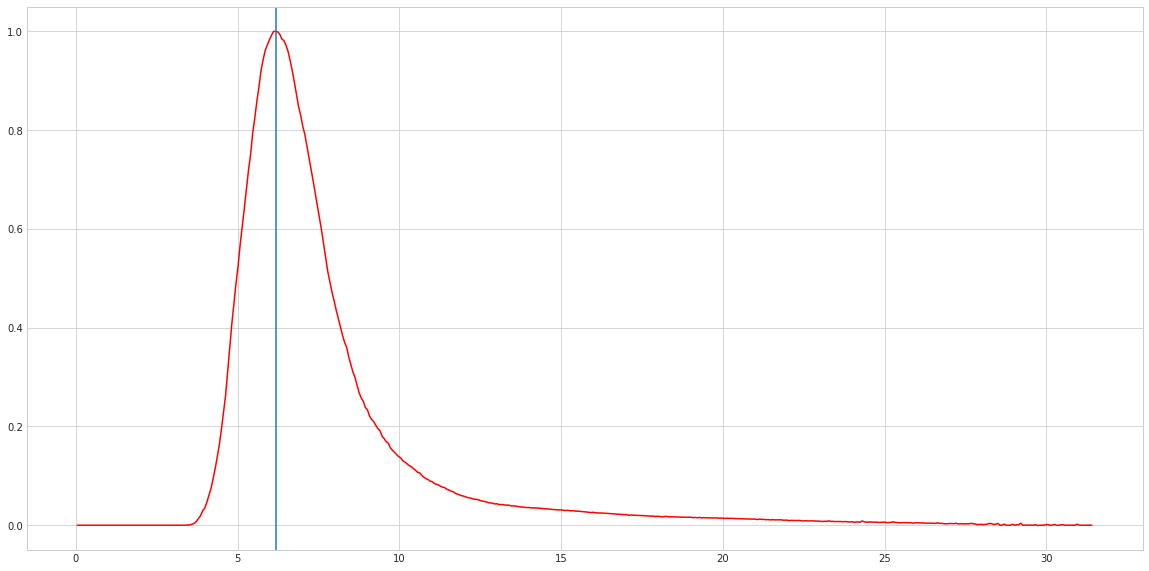

In [38]:
from numpy import loadtxt

# Max at 6.17742

template = loadtxt('template.csv', delimiter=',')
print(f'''Template dimensions: {template.shape}''')

# for entry in template: print(entry) print(template[:,0]) print(template[:,1])

plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (20,10)

_ = plt.plot(template[:,0], template[:,1], '-r')
plt.axvline(x=6.17742)

In [3]:
def tempfit(x, *par):
    return par[0]*np.interp((x - par[1]), template[:,0], template[:,1]) + par[2]
    


Read an array: (10698, 36)


/tmp/ipykernel_22720/2247100489.py:27: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  _ = myTuple[1].hist2d(r2, buzz, bins=(100,100), range=((0.98, 1.0), (0, 40)), norm=colors.LogNorm(1.0), cmap='plasma')


Text(0, 0.5, 'Buzz')

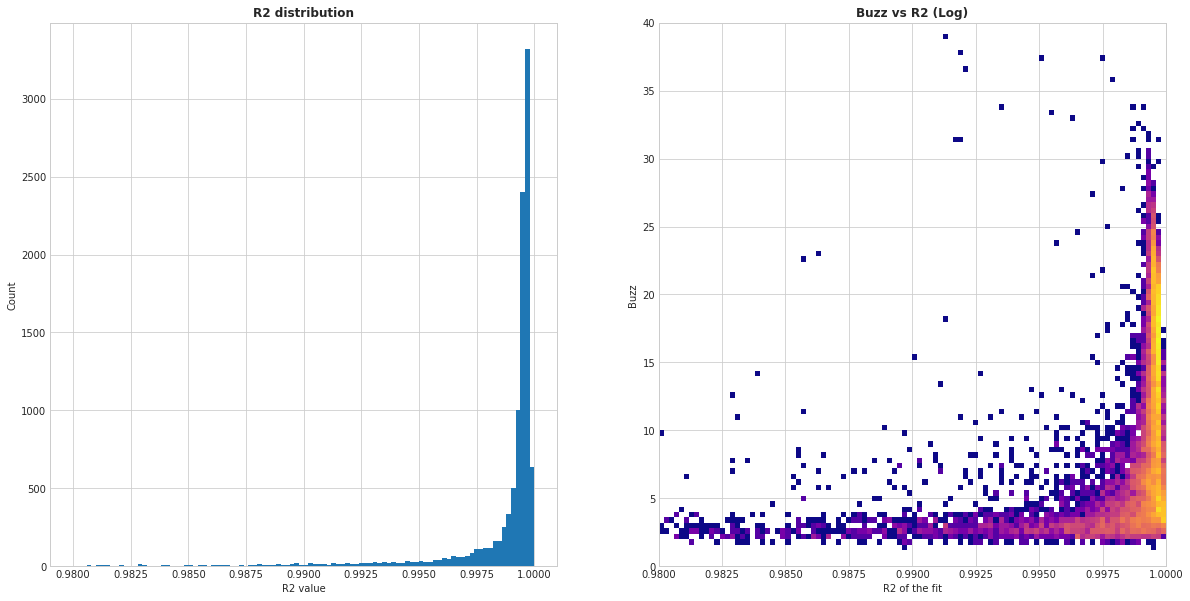

In [33]:
import numpy as np
from    matplotlib import colors

with open('./data/8gev_2099_27.npy', 'rb') as f: X = np.load(f)
print(f'''Read an array: {X.shape}''')

cnt=0
x  = np.linspace(0, 31, 31, endpoint=False)
x1 = np.linspace(0, 31, 310, endpoint=False)
# print(x)

plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (20,10)

myTuple = ((None, None), (None, None))

fig, myTuple = plt.subplots(1,2)

buzz    = wave=X[:,34]
r2      = wave=X[:,35]

_ = myTuple[0].hist(r2, bins=100, range=(0.98, 1.0))
myTuple[0].set_title('R2 distribution', fontweight='bold')
myTuple[0].set_xlabel('R2 value')
myTuple[0].set_ylabel('Count')

_ = myTuple[1].hist2d(r2, buzz, bins=(100,100), range=((0.98, 1.0), (0, 40)), norm=colors.LogNorm(1.0), cmap='plasma')

myTuple[1].grid(True)

myTuple[1].set_title('Buzz vs R2 (Log)', fontweight='bold')

myTuple[1].set_xlabel('R2 of the fit')
myTuple[1].set_ylabel('Buzz')

# myTuple[1].xaxis.set_zorder(10.0)
# ax1.yaxis.set_zorder(10.0)

#for entry in X:
#    wave=entry[35]

# for entry in X:

#     wave=entry[0:31]
#     params=entry[31:]

#     fit1 = tempfit(x1, *params)
#     fit  = tempfit(x, *params)

#     # print(f'''p{params}''')
#     # print(f'''f{fit}''')
#     # print(f'''d{wave-fit}''')

#     _ = myTuple[cnt].plot(x1, fit1, '-')
#     _ = myTuple[cnt].plot(x, wave, 'o',  markersize=8)

#     cnt+=1
#     if(cnt==1): break

# cnt=0
# myTuple = (None, None, None, None)
# fig, myTuple = plt.subplots(1,2)

# for entry in X:

#     wave=entry[0:31]
#     params=entry[31:]

#     fit  = tempfit(x, *params)

#     # print(f'''p{params}''')
#     # print(f'''f{fit}''')
#     # print(f'''d{wave-fit}''')

#     _ = myTuple[cnt].plot(x, (wave-fit), 'o',  markersize=8)

#     cnt+=1
#     if(cnt==1): break    

Read an array: (13150, 37)


/tmp/ipykernel_22720/1075922442.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  _ = myTuple[1].hist2d(a_real, a_infr - a_real, bins=(100,100), range=((0.0, 5000.0), (-50.0, 50)), norm=colors.LogNorm(1.0), cmap='plasma')


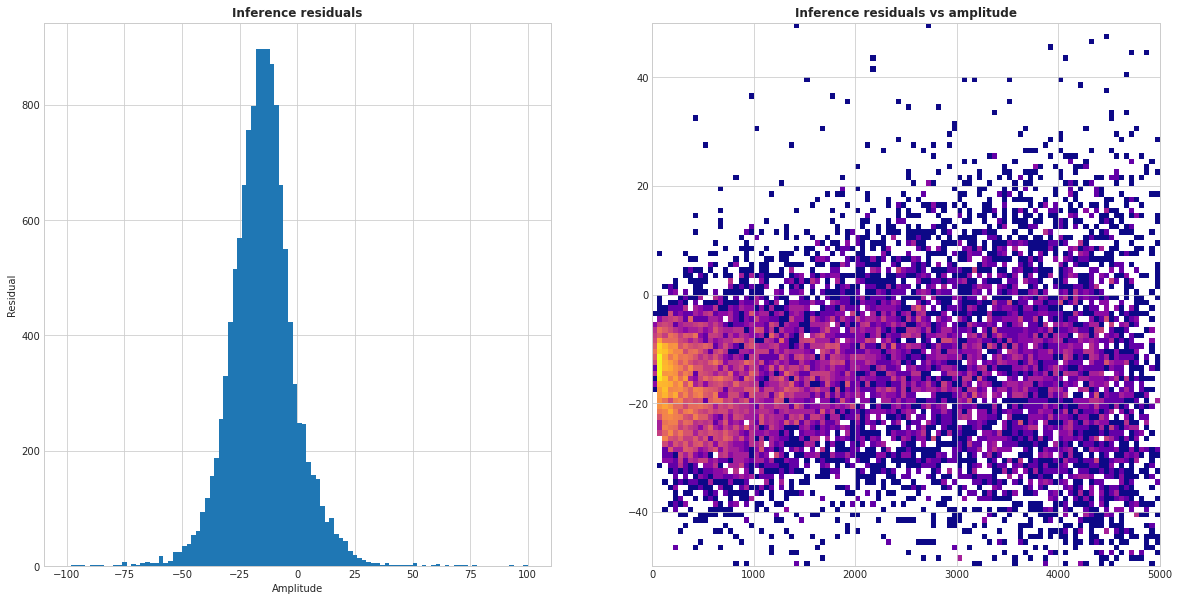

In [53]:
import numpy as np
from    matplotlib import colors

with open('test.npy', 'rb') as f: X = np.load(f)
print(f'''Read an array: {X.shape}''')

plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (20,10)

myTuple = ((None, None), (None, None))

fig, myTuple = plt.subplots(1,2)

a_real    = wave=X[:,31]
a_infr    = wave=X[:,34]

_ = myTuple[0].hist(a_infr - a_real, bins=100, range=(-100.0, 100.0))
myTuple[0].set_title('Inference residuals', fontweight='bold')
myTuple[0].set_xlabel('ADC ch.')


_ = myTuple[1].hist2d(a_real, a_infr - a_real, bins=(100,100), range=((0.0, 5000.0), (-50.0, 50)), norm=colors.LogNorm(1.0), cmap='plasma')
myTuple[0].set_title('Inference residuals', fontweight='bold')
myTuple[0].set_xlabel('Amplitude')
myTuple[0].set_ylabel('Residual')

myTuple[1].set_title('Inference residuals vs amplitude', fontweight='bold')
myTuple[1].xaxis.set_zorder(10.0)
myTuple[1].yaxis.set_zorder(10.0)
myTuple[1].grid(True)

Read an array: (10792, 35)


/tmp/ipykernel_3973/2333305824.py:33: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  _ = ax7.hist2d(amplitudes, buzz, bins=(100,100), range=((0, 5000), (0, 50)), norm=colors.LogNorm(1.0), cmap='Blues')


Read an array: (5973, 35)


/tmp/ipykernel_3973/2333305824.py:65: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  _ = ax8.hist2d(amplitudes, buzz, bins=(100,100), range=((0, 5000), (0, 50)), norm=colors.LogNorm(1.0), cmap='Oranges')


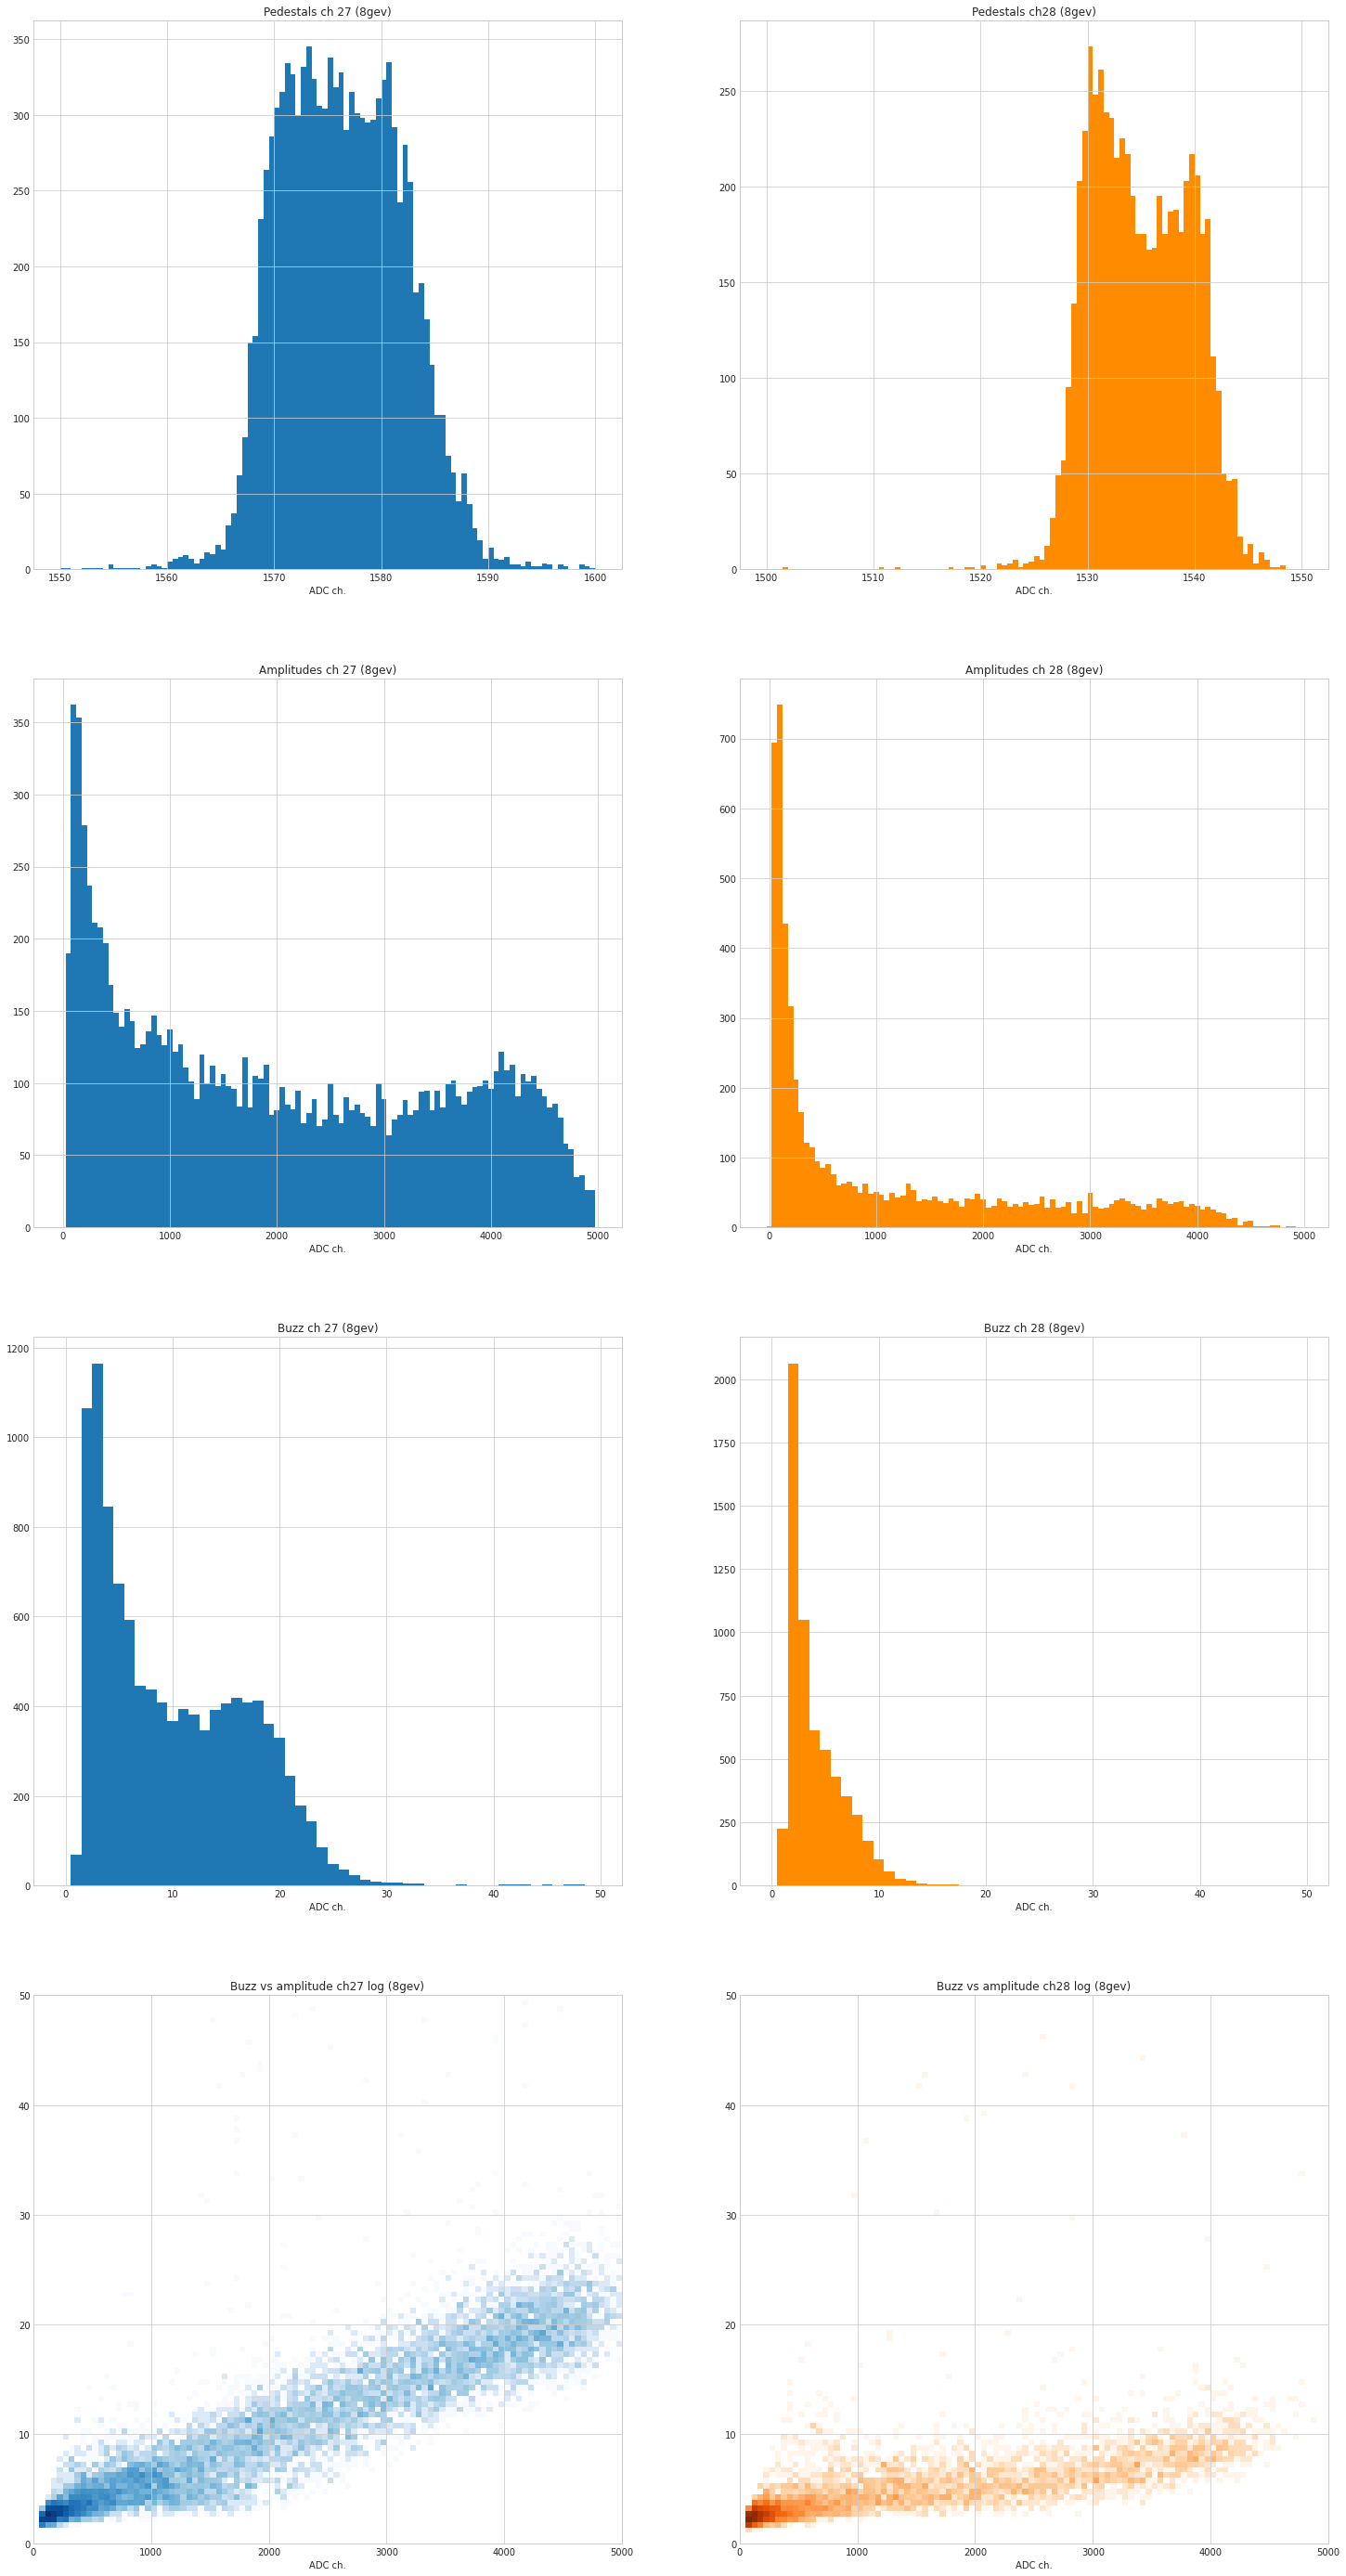

In [10]:
with open('8gev_2099_27.npy', 'rb') as f: X = np.load(f)
print(f'''Read an array: {X.shape}''')

buzz = X[:,34]
pedestals = X[:,33]
amplitudes = X[:,31]

from    matplotlib import colors

plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (25,50)

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2)

_ = ax1.hist(pedestals, bins=100, range=(1550, 1600))
ax1.set_title('Pedestals ch 27 (8gev)')
ax1.set_xlabel('ADC ch.')

ax1.xaxis.set_zorder(10.0)
ax1.yaxis.set_zorder(10.0)


_ = ax3.hist(amplitudes, align='left', bins=100, range=(0, 5000))
ax3.set_title('Amplitudes ch 27 (8gev)')
ax3.set_xlabel('ADC ch.')
ax3.xaxis.set_zorder(10.0)
ax3.yaxis.set_zorder(10.0)

_ = ax5.hist(buzz, align='left', bins=50, range=(0, 50))
ax5.set_title('Buzz ch 27 (8gev)')
ax5.set_xlabel('ADC ch.')

_ = ax7.hist2d(amplitudes, buzz, bins=(100,100), range=((0, 5000), (0, 50)), norm=colors.LogNorm(1.0), cmap='Blues')
ax7.set_title('Buzz vs amplitude ch27 log (8gev)')
ax7.set_xlabel('ADC ch.')
ax7.grid(True)
ax7.xaxis.set_zorder(10.0)
ax7.yaxis.set_zorder(10.0)

with open('8gev_2099_28.npy', 'rb') as f: X = np.load(f)
print(f'''Read an array: {X.shape}''')
buzz = X[:,34]
pedestals = X[:,33]
amplitudes = X[:,31]

_ = ax2.hist(pedestals, bins=100, range=(1500, 1550), color='darkorange')
ax2.set_title('Pedestals ch28 (8gev)')
ax2.set_xlabel('ADC ch.')

ax2.xaxis.set_zorder(10.0)
ax2.yaxis.set_zorder(10.0)


_ = ax4.hist(amplitudes, align='left', bins=100, range=(0, 5000), color='darkorange')
ax4.set_title('Amplitudes ch 28 (8gev)')
ax4.set_xlabel('ADC ch.')

ax4.xaxis.set_zorder(10.0)
ax4.yaxis.set_zorder(10.0)

_ = ax6.hist(buzz, align='left', bins=50, range=(0, 50), color='darkorange')
ax6.set_title('Buzz ch 28 (8gev)')
ax6.set_xlabel('ADC ch.')

_ = ax8.hist2d(amplitudes, buzz, bins=(100,100), range=((0, 5000), (0, 50)), norm=colors.LogNorm(1.0), cmap='Oranges')
ax8.set_title('Buzz vs amplitude ch28 log (8gev)')
ax8.set_xlabel('ADC ch.')
ax8.grid(True)
ax8.xaxis.set_zorder(10.0)
ax8.yaxis.set_zorder(10.0)


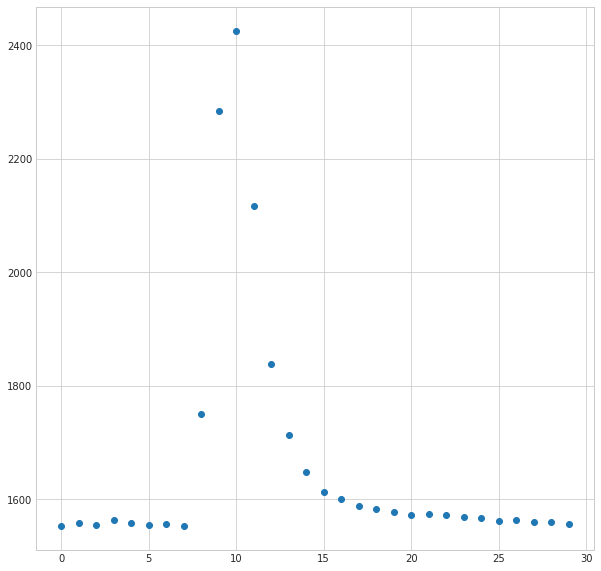

In [12]:
import numpy as np
import  matplotlib.pyplot as plt
import  scipy
from    scipy.optimize import curve_fit

x  = np.linspace(0, 30, 30, endpoint=False)
x1 = np.linspace(0, 30, 300, endpoint=False)

# print(x)

plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (10,10)

for i in range(0,1):
    plt.plot(x, wave[i], 'o')

    continue
    popt, _ = scipy.optimize.curve_fit(tempfit, x, wave[i], p0=[500.0, 7.0, 1500.0]) # , p0=guess)
    print(popt)
    plt.plot(x1, tempfit(x1, *popt))

    # residual sum of squares
    ss_res = np.sum((wave[i] - tempfit(x, *popt)) ** 2)

    # total sum of squares
    ss_tot = np.sum((wave[i] - np.mean(wave[i])) ** 2)

    # r-squared
    r2 = 1 - (ss_res / ss_tot)


    #perform Kolmogorov-Smirnov test
    ks = ks_2samp(wave[i], tempfit(x, *popt))
    
    print("R2: ", r2, ' KS: ', ks)    

Template dimensions: (363619, 2)


Text(0, 0.5, 'R2 of the fit')

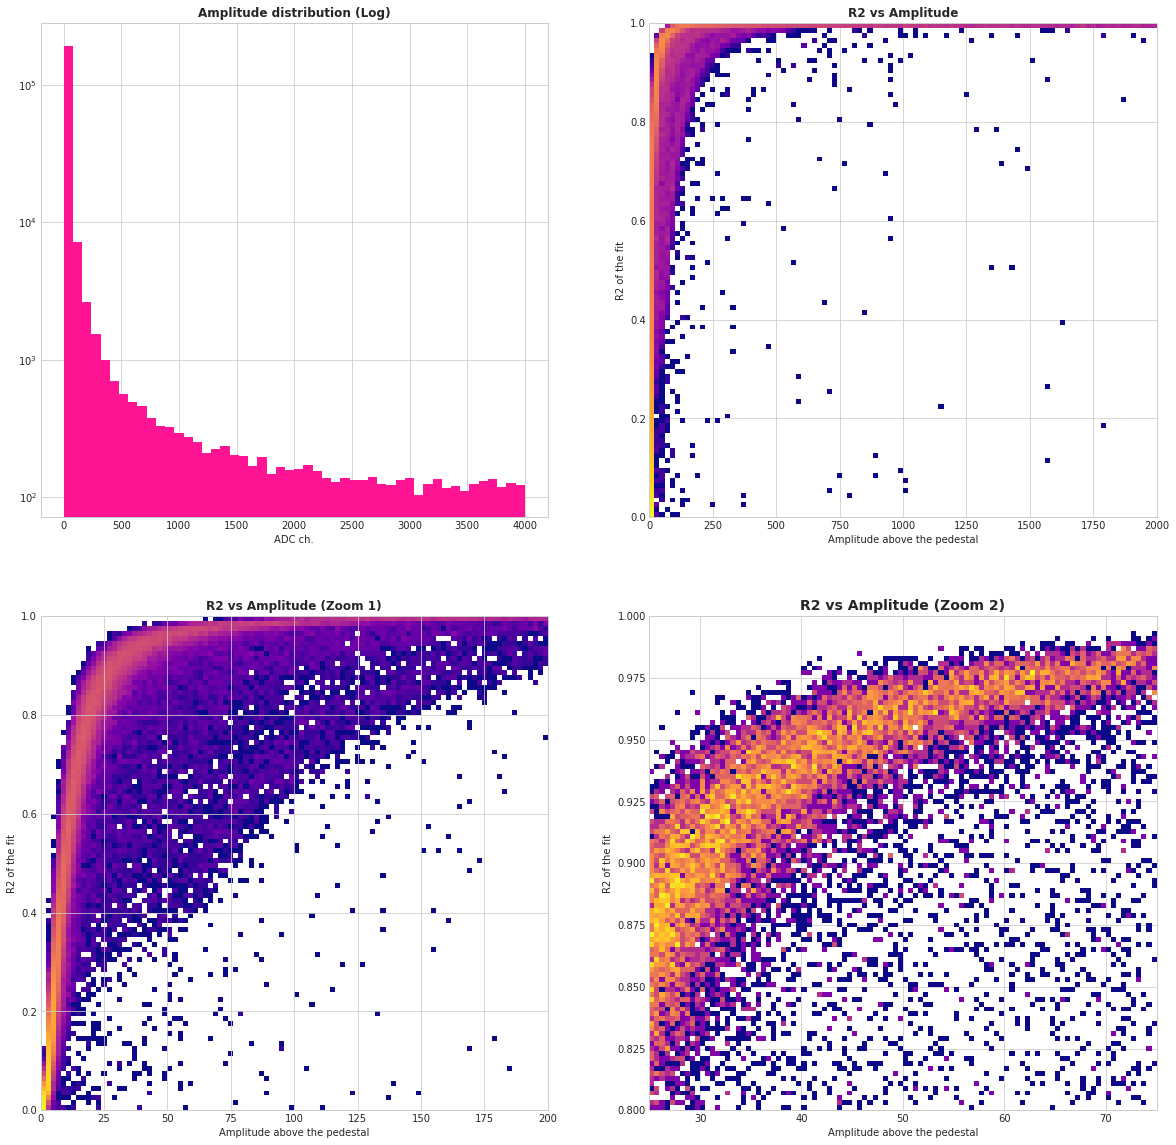

In [11]:
# Ad hoc analysis
from    matplotlib import colors
from numpy import loadtxt

r2 = loadtxt('r2.csv', delimiter=',')
print(f'''Template dimensions: {r2.shape}''')

plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (20,20)

# template[:,0], template[:,1]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

ax1.set_yscale('log')

_ = ax1.hist(r2[:,0], bins=50, color='deeppink', range=(0.0, 4000.0))
ax1.set_title('Amplitude distribution (Log)', fontweight='bold')
ax1.set_xlabel('ADC ch.')

ax2.grid(False)
_ = ax2.hist2d(r2[:,0], r2[:,1], bins=(100,100), range=((0.0, 2000.0), (0, 1.0)), norm=colors.LogNorm(1.0), cmap='plasma')
ax2.grid(True)
ax2.set_title('R2 vs Amplitude', fontweight='bold')
ax2.set_xlabel('Amplitude above the pedestal')
ax2.set_ylabel('R2 of the fit')


ax3.xaxis.set_zorder(10.0)
ax3.yaxis.set_zorder(10.0)

ax3.grid(False)
_ = ax3.hist2d(r2[:,0], r2[:,1], bins=(100,100), range=((0.0, 200.0), (0, 1.0)), norm=colors.LogNorm(1.0), cmap='plasma')

ax3.grid(True)
ax3.set_title('R2 vs Amplitude (Zoom 1)', fontweight='bold')
ax3.set_xlabel('Amplitude above the pedestal')
ax3.set_ylabel('R2 of the fit')

ax4.grid(False)
_ = ax4.hist2d(r2[:,0], r2[:,1], bins=(100,100), range=((25.0, 75.0), (0.8, 1.0)), norm=colors.LogNorm(1.0), cmap='plasma')

ax4.grid(True)
ax4.set_title('R2 vs Amplitude (Zoom 2)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Amplitude above the pedestal')
ax4.set_ylabel('R2 of the fit')
